In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", None)

## Genres
#### Goals

- Get list of genres for each streaming services' TV shows
- Create columns for each genre, 1 indicating it is present and 0 it is not
- Calculate percentage of genres for each streaming service

We will specify the process for Netflix and repeat the same steps for Amazon and HBO.

----

### 1. Netflix

#### i. Import data

In [2]:
netflix = pd.read_pickle("../Data/netflix_final_clean.pkl")

In [3]:
netflix.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,Breaking Bad,2008,18.0,9.5,tt0903747,tvSeries,Breaking Bad,Breaking Bad,2008.0,2008.0,49.0,"Crime,Drama,Thriller"
1,Stranger Things,2016,16.0,8.8,tt4574334,tvSeries,Stranger Things,Stranger Things,2016.0,2016.0,51.0,"Drama,Fantasy,Horror"
2,Sherlock,2010,16.0,9.1,tt1475582,tvSeries,Sherlock,Sherlock,2010.0,2010.0,88.0,"Crime,Drama,Mystery"
3,Better Call Saul,2015,18.0,8.7,tt3032476,tvSeries,Better Call Saul,Better Call Saul,2015.0,2015.0,46.0,"Crime,Drama"
4,The Office,2005,16.0,8.9,tt0386676,tvSeries,The Office,The Office,2005.0,2005.0,22.0,Comedy


#### ii. Check null values for genres column

We will check for null values, dashes or spaces.

In [4]:
netflix["genres"].isna().sum()

0

In [5]:
netflix[netflix["genres"] == ("-")]

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres


In [6]:
netflix[netflix["genres"] == (" ")]

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres


We don't seem to have null values, so we will now create a new data frame for shows and genres.

#### iii. Create new data frame

In [7]:
netflix_genres = netflix[["show", "genres"]]

netflix_genres.head()

,show,genres
0,Breaking Bad,"Crime,Drama,Thriller"
1,Stranger Things,"Drama,Fantasy,Horror"
2,Sherlock,"Crime,Drama,Mystery"
3,Better Call Saul,"Crime,Drama"
4,The Office,Comedy


#### iv. Obtain list of total genres

As seen on the table above, shows can have up to 3 genres, which are separated by a comma. We will get a list containing all available genres for Netflix. We will follow the same process for Amazon and HBO.

In [8]:
# iterate through the genres column in order to get a list of genres for every show

genres = [genre.split(",") for genre in netflix_genres["genres"]]

In [9]:
# we will loop through the genres concatenated lists in order to get unique values.

# create empty list for unique genres
unique_genres_netflix = []

# loop through genres concatenated lists
for i in genres:
    # loop through individual lists inside of genres
    for j in i:
        # append to unique_genres if it is a new genre
        if j not in unique_genres_netflix:
            unique_genres_netflix.append(j)


In [10]:
unique_genres_netflix

['Crime',
 'Drama',
 'Thriller',
 'Fantasy',
 'Horror',
 'Mystery',
 'Comedy',
 'Sci-Fi',
 'Biography',
 'Action',
 'Adventure',
 'Romance',
 'History',
 'Documentary',
 'Animation',
 'War',
 'Sport',
 'Family',
 'Western',
 'Short',
 'Reality-TV',
 'Musical',
 'Music',
 'Game-Show',
 'Talk-Show',
 'News',
 '\\N']

There is a null value written as "\\N", we will remove rows with this value and remove it from our list.

In [11]:
netflix_genres[netflix_genres["genres"] == "\\N"]

,show,genres
1106,Rebel Without a Kitchen,\N
1165,Life on Location,\N
1194,Hive Alive,\N
1242,Wildest Middle East,\N
1260,Slice of Paradise,\N
1484,The Circle Brazil,\N
1538,The Circle France,\N


In [12]:
netflix_genres = netflix_genres[netflix_genres["genres"] != "\\N"].reset_index(drop=True).copy()

In [13]:
unique_genres_netflix.remove("\\N")

In [14]:
len(unique_genres_netflix)

26

We have 26 unique genres for Netflix's TV shows.

#### v. Create columns for each genre

We will now create columns for each genre, 1 indicating it is present and 0 is not.

In [15]:
# we will loop through the list of unique_genres to create new columns for each one with 0 as values

for genre in unique_genres_netflix:
    netflix_genres[genre] = 0

In [16]:
netflix_genres.head()

,show,genres,Crime,Drama,Thriller,Fantasy,Horror,Mystery,Comedy,Sci-Fi,Biography,Action,Adventure,Romance,History,Documentary,Animation,War,Sport,Family,Western,Short,Reality-TV,Musical,Music,Game-Show,Talk-Show,News
0,Breaking Bad,"Crime,Drama,Thriller",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Stranger Things,"Drama,Fantasy,Horror",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Sherlock,"Crime,Drama,Mystery",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Better Call Saul,"Crime,Drama",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,The Office,Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# using pandas str.contains method we will change column values to 1 if genre is present

for genre in unique_genres_netflix:
    netflix_genres[genre] = netflix_genres["genres"].str.contains(genre).astype(int)

In [18]:
netflix_genres.head()

,show,genres,Crime,Drama,Thriller,Fantasy,Horror,Mystery,Comedy,Sci-Fi,Biography,Action,Adventure,Romance,History,Documentary,Animation,War,Sport,Family,Western,Short,Reality-TV,Musical,Music,Game-Show,Talk-Show,News
0,Breaking Bad,"Crime,Drama,Thriller",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Stranger Things,"Drama,Fantasy,Horror",0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Sherlock,"Crime,Drama,Mystery",1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Better Call Saul,"Crime,Drama",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,The Office,Comedy,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We will export this data frame in order to use it for the user survey resutls.

In [19]:
# netflix_genres.to_pickle("../Data/netflix_genres.pkl")

#### vi. Calculate percentage for each genre

We will calculate the ratio between the frequency of each genre and the total amount of TV shows.

In [20]:
netflix_genre_ratio = (pd.DataFrame(netflix_genres[unique_genres_netflix].sum()
                                    .sort_values(ascending=False))
                       .reset_index()
                       .rename(columns={"index":"genre", 0:"frequency"}))

In [21]:
netflix_genre_ratio.head()

,genre,frequency
0,Drama,614
1,Comedy,446
2,Documentary,280
3,Animation,273
4,Crime,239


In [22]:
netflix_genre_ratio["ratio"] = round((netflix_genre_ratio["frequency"] / len(netflix_genres)), 4)

In [23]:
netflix_genre_ratio

,genre,frequency,ratio
0,Drama,614,0.3767
1,Comedy,446,0.2736
2,Documentary,280,0.1718
3,Animation,273,0.1675
4,Crime,239,0.1466
5,Action,228,0.1399
6,Adventure,194,0.1190
7,Reality-TV,144,0.0883
8,Romance,128,0.0785
9,Family,101,0.0620


The sum of the ratio column will not be equal to one because each TV shows can have up to 3 genres.

In [24]:
netflix_genre_ratio["percentage"] = netflix_genre_ratio["ratio"]*100

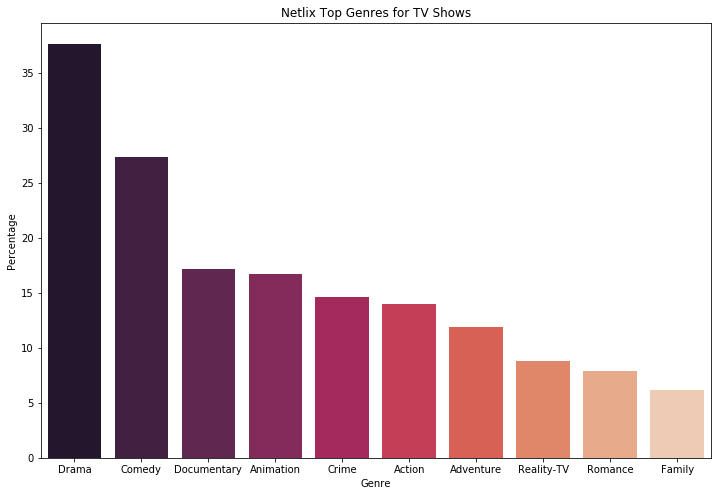

In [25]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data=netflix_genre_ratio.head(10),
           x="genre",
           y="percentage",
           palette="rocket")

ax.set_title("Netlix Top Genres for TV Shows")
ax.set_xlabel("Genre")
ax.set_ylabel("Percentage");

From the new data frame we can conclude that Drama and Comedy are the most common genres for Netflix's TV shows, being present in 37 and 27%, respectively, of all TV shows. We have Documentary, Animation, Crime, Action and Adventure between 20 and 10% of all TV shows.

#### vii. Export data

In [26]:
# netflix_genre_ratio.to_pickle("../Data/netflix_genres_ratio.pkl")

-----

### 2. Amazon

#### i. Import data

In [27]:
amazon = pd.read_pickle("../Data/amazon_final_clean.pkl")

In [28]:
amazon.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,The Wire,2002,18.0,9.3,tt0306414,tvSeries,The Wire,The Wire,2002.0,2002.0,59.0,"Crime,Drama,Thriller"
1,The Sopranos,1999,18.0,9.2,tt0141842,tvSeries,The Sopranos,The Sopranos,1999.0,1999.0,55.0,"Crime,Drama"
2,Band of Brothers,2001,18.0,9.4,tt0185906,tvMiniSeries,Band of Brothers,Band of Brothers,2001.0,2001.0,594.0,"Action,Drama,History"
3,Vikings,2013,18.0,8.6,tt2306299,tvSeries,Vikings,Vikings,2013.0,2013.0,44.0,"Action,Adventure,Drama"
4,Mr. Robot,2015,18.0,8.5,tt4158110,tvSeries,Mr. Robot,Mr. Robot,2015.0,2015.0,49.0,"Crime,Drama,Thriller"


#### ii. Check null values for genres column

In [29]:
amazon[amazon["genres"].isna()]

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres


In [30]:
amazon[amazon["genres"] == "\\N"]

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
142,Undercover,2011,7.0,8.9,tt4266524,tvSeries,Undercover,Undercover,2011.0,2011.0,NaN,\N
426,All or Nothing: Brazil National Team,2020,16.0,7.5,tt11621718,tvSeries,All or Nothing: Brazil National Team,All or Nothing: Brazil National Team,2020.0,2020.0,NaN,\N
709,Rob Delaney: Jackie,2020,NaN,6.4,tt11433098,tvSpecial,Rob Delaney: Jackie,Rob Delaney: Jackie,2020.0,2020.0,62.0,\N
788,Wildest Indochina,2014,NaN,8.3,tt3902878,tvSeries,Wildest Indochina,Wildest Indochina,2014.0,2014.0,NaN,\N
832,New York Goes to Work,2009,NaN,4.9,tt1429423,tvSeries,New York Goes to Work,New York Goes to Work,2009.0,2009.0,NaN,\N
847,Superships,2001,0.0,8.4,tt1090143,tvSeries,Superships,Superships,2001.0,2001.0,NaN,\N
928,Instruments of Death,2012,NaN,8.3,tt2986266,tvSeries,Instruments of Death,Instruments of Death,2012.0,2012.0,NaN,\N
933,Black in Latin America,2011,NaN,7.6,tt3008828,tvSeries,Black in Latin America,Black in Latin America,2011.0,2011.0,NaN,\N
937,Ancient Warriors,1994,NaN,6.3,tt4533436,tvSeries,Ancient Warriors,Ancient Warriors,1994.0,1994.0,NaN,\N
948,Basic Colors with BabyFirst,2011,NaN,NaN,tt6954674,tvSeries,Basic Colors with BabyFirst,Basic Colors with BabyFirst,2011.0,2011.0,43.0,\N


We will remove values containing "\N".

#### iii. Create new data frame

In [31]:
amazon_genres = amazon[amazon["genres"] != "\\N"]

amazon_genres = amazon_genres[["show", "genres"]].reset_index(drop=True)

amazon_genres.head()

,show,genres
0,The Wire,"Crime,Drama,Thriller"
1,The Sopranos,"Crime,Drama"
2,Band of Brothers,"Action,Drama,History"
3,Vikings,"Action,Adventure,Drama"
4,Mr. Robot,"Crime,Drama,Thriller"


#### iv. Obtain list of total genres

In [32]:
# we will define a function called total_genres to get the list of unique genres, based on the process we followed
# for Netflix

def total_genres(df_genres):
    genres = [genre.split(",") for genre in df_genres]
    unique_genres = []

    for i in genres:
        for j in i:
            if j not in unique_genres:
                unique_genres.append(j)
    
    return unique_genres

In [33]:
unique_genres_amazon = total_genres(amazon_genres["genres"])

unique_genres_amazon

['Crime',
 'Drama',
 'Thriller',
 'Action',
 'History',
 'Adventure',
 'Comedy',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Romance',
 'Family',
 'Fantasy',
 'Talk-Show',
 'Game-Show',
 'Reality-TV',
 'Music',
 'Musical',
 'Animation',
 'War',
 'Sport',
 'Biography',
 'Documentary',
 'Western',
 'Short',
 'News']

In [34]:
len(unique_genres_amazon)

26

We have 26 unique genres for Amazon's TV shows, same as for Netflix.

#### v. Create columns for each genre

In [35]:
# we will define a function called genre_columns to create new columns for each genre, based on the process we followed
# for Netflix

def genre_columns(df, unique_genres):
    
    for genre in unique_genres:
        df[genre] = 0
        
    for genre in unique_genres:
        df[genre] = df["genres"].str.contains(genre).astype(int)
        
    return df

In [36]:
amazon_genres = genre_columns(amazon_genres, unique_genres_amazon)

amazon_genres.head()

,show,genres,Crime,Drama,Thriller,Action,History,Adventure,Comedy,Mystery,Sci-Fi,Horror,Romance,Family,Fantasy,Talk-Show,Game-Show,Reality-TV,Music,Musical,Animation,War,Sport,Biography,Documentary,Western,Short,News
0,The Wire,"Crime,Drama,Thriller",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Sopranos,"Crime,Drama",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Band of Brothers,"Action,Drama,History",0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Vikings,"Action,Adventure,Drama",0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Mr. Robot,"Crime,Drama,Thriller",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
# amazon_genres.to_pickle("../Data/amazon_genres.pkl")

#### vi. Calculate percentage for each genre

In [38]:
# we will define a function called genre_ratio to create a new data frame in which we have a genres and their
# ratio and percentage, based on the process we followed for Netflix

def genre_ratio(df, unique_genres):
    
    genre_ratio = (pd.DataFrame(df[unique_genres].sum().sort_values(ascending=False))
                       .reset_index()
                       .rename(columns={"index":"genre", 0:"frequency"}))
    
    genre_ratio["ratio"] = round((genre_ratio["frequency"] / len(df)), 4)
    
    genre_ratio["percentage"] = genre_ratio["ratio"]*100
    
    return genre_ratio

In [39]:
amazon_genre_ratio = genre_ratio(amazon_genres, unique_genres_amazon)

In [40]:
amazon_genre_ratio

,genre,frequency,ratio,percentage
0,Drama,420,0.3349,33.49
1,Comedy,305,0.2432,24.32
2,Documentary,253,0.2018,20.18
3,Animation,203,0.1619,16.19
4,Crime,157,0.1252,12.52
5,Adventure,154,0.1228,12.28
6,Action,152,0.1212,12.12
7,Family,131,0.1045,10.45
8,Reality-TV,128,0.1021,10.21
9,History,76,0.0606,6.06


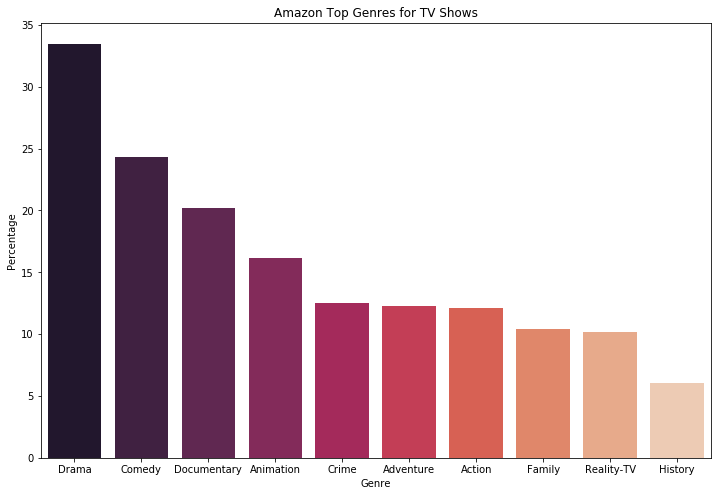

In [41]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data=amazon_genre_ratio.head(10),
           x="genre",
           y="percentage",
           palette="rocket")

ax.set_title("Amazon Top Genres for TV Shows")
ax.set_xlabel("Genre")
ax.set_ylabel("Percentage");

From the new data frame we can conclude that Drama and Comedy are the most common genres for Amazon's TV shows, same for Netflix, being present in 33 and 24%, respectively, of all TV shows. We have Documentary, Animation, Crime, Adventure, Action, Family, and Reality-TV between 20 and 10% of all TV shows.

#### vii. Export data

In [42]:
# amazon_genre_ratio.to_pickle("../Data/amazon_genres_ratio.pkl")

-----

### 3. HBO

#### i. Import data

In [43]:
hbo = pd.read_pickle("../Data/hbo_final_clean.pkl")

In [44]:
hbo.head()

,show,year,age,imdb_rating,imdb_id,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,Game of Thrones,2011,18.0,9.3,tt0944947,tt0944947,tvSeries,Game of Thrones,Game of Thrones,2011.0,2011.0,57.0,"Action,Adventure,Drama"
1,The Wire,2002,18.0,9.3,tt0306414,tt0306414,tvSeries,The Wire,The Wire,2002.0,2002.0,59.0,"Crime,Drama,Thriller"
2,Chernobyl,2019,18.0,9.4,tt7366338,tt7366338,tvMiniSeries,Chernobyl,Chernobyl,2019.0,2019.0,330.0,"Drama,History,Thriller"
3,The Sopranos,1999,18.0,9.2,tt0141842,tt0141842,tvSeries,The Sopranos,The Sopranos,1999.0,1999.0,55.0,"Crime,Drama"
4,Band of Brothers,2001,18.0,9.4,tt0185906,tt0185906,tvMiniSeries,Band of Brothers,Band of Brothers,2001.0,2001.0,594.0,"Action,Drama,History"


#### ii. Check null values for genres column


In [45]:
hbo[hbo["genres"].isna()]

,show,year,age,imdb_rating,imdb_id,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres


In [46]:
hbo[hbo["genres"] == "\\N"]

,show,year,age,imdb_rating,imdb_id,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
94,We're Here,2020,18.0,7.4,tt11285856,tt11285856,tvSeries,We're Here,We're Here,2020.0,2020.0,NaN,\N
155,Russell Simmons Presents Brave New Voices,2009,NaN,6.2,tt1403951,tt1403951,tvSeries,Russell Simmons Presents Brave New Voices,Russell Simmons Presents Brave New Voices,2009.0,2009.0,NaN,\N
156,HBO Storybook Musicals,1987,0.0,NaN,tt2738036,tt2738036,tvSeries,HBO Storybook Musicals,HBO Storybook Musicals,1987.0,1987.0,NaN,\N


#### iii. Create new data frame

In [47]:
hbo_genres = hbo[hbo["genres"] != "\\N"]

hbo_genres = hbo_genres[["show", "genres"]].reset_index(drop=True)

hbo_genres.head()

,show,genres
0,Game of Thrones,"Action,Adventure,Drama"
1,The Wire,"Crime,Drama,Thriller"
2,Chernobyl,"Drama,History,Thriller"
3,The Sopranos,"Crime,Drama"
4,Band of Brothers,"Action,Drama,History"


#### iv. Obtain list of total genres

In [48]:
unique_genres_hbo = total_genres(hbo_genres["genres"])

unique_genres_hbo

['Action',
 'Adventure',
 'Drama',
 'Crime',
 'Thriller',
 'History',
 'Mystery',
 'Sci-Fi',
 'Comedy',
 'News',
 'Talk-Show',
 'Fantasy',
 'Music',
 'Musical',
 'Documentary',
 'Family',
 'War',
 'Sport',
 'Biography',
 'Romance',
 'Animation',
 'Horror',
 'Reality-TV',
 'Game-Show']

In [49]:
len(unique_genres_hbo)

24

We have 24 unique genres for HBO's TV shows.

#### v. Create columns for each genre


In [50]:
hbo_genres = genre_columns(hbo_genres, unique_genres_hbo)

hbo_genres.head()

,show,genres,Action,Adventure,Drama,Crime,Thriller,History,Mystery,Sci-Fi,Comedy,News,Talk-Show,Fantasy,Music,Musical,Documentary,Family,War,Sport,Biography,Romance,Animation,Horror,Reality-TV,Game-Show
0,Game of Thrones,"Action,Adventure,Drama",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Wire,"Crime,Drama,Thriller",0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Chernobyl,"Drama,History,Thriller",0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Sopranos,"Crime,Drama",0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Band of Brothers,"Action,Drama,History",1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# hbo_genres.to_pickle("../Data/hbo_genres.pkl")

#### vi. Calculate percentage for each genre

In [52]:
hbo_genre_ratio = genre_ratio(hbo_genres, unique_genres_hbo)

hbo_genre_ratio

,genre,frequency,ratio,percentage
0,Drama,86,0.5089,50.89
1,Comedy,66,0.3905,39.05
2,Crime,26,0.1538,15.38
3,Documentary,17,0.1006,10.06
4,Mystery,14,0.0828,8.28
5,Action,13,0.0769,7.69
6,Romance,13,0.0769,7.69
7,History,13,0.0769,7.69
8,Adventure,9,0.0533,5.33
9,Sport,9,0.0533,5.33


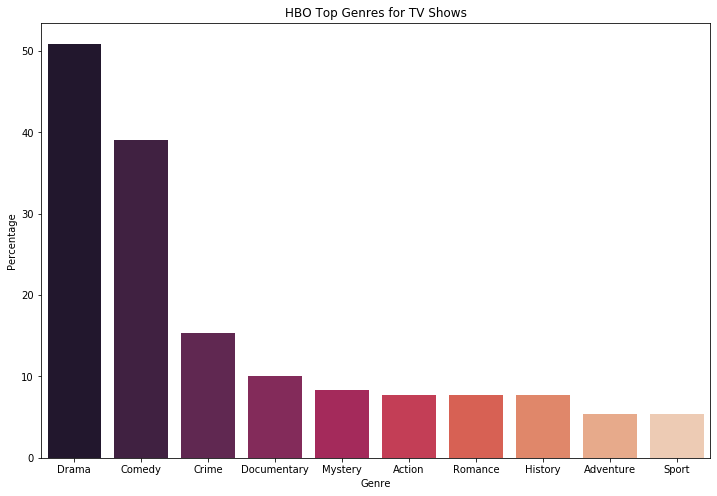

In [53]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data=hbo_genre_ratio.head(10),
           x="genre",
           y="percentage",
           palette="rocket")

ax.set_title("HBO Top Genres for TV Shows")
ax.set_xlabel("Genre")
ax.set_ylabel("Percentage");

From the new data frame we can conclude that Drama and Comedy are the most common genres for Amazon's TV shows, same for Netflix and Amazon, being present in 50 and 39%, respectively, of all TV shows. We have Crime and Documentary between 20 and 10% of all TV shows.

#### vii. Export data

In [54]:
# hbo_genre_ratio.to_pickle("../Data/hbo_genres_ratio.pkl")

----

### 4. Comparison

- All streaming services have Drama and Comedy as their top 1 and 2, respectively, genres.
- All streaming services have Action and Adventure in their top 10 genres.
- Netflix and Amazon seem to have very similar genre distributions for their top 10 genres, however, Romance is on place 9 for Netflix and on 12 for Amazon.
- HBO is different from the other two, having on their top 10 Mystery, Sci-Fi, Thriller and Fantasy, while the other two have Documentary, Animation, Family and Reality-TV in their top 10.